# Template Notebook
This demos some code to facilitate running notebooks in VS Code, JupyterLab, or Colab.

#### Some LaTeX macros (hidden in math mode) that will not render correctly in VS Code
$
\newcommand{\vh}{\boldsymbol{h}}
\newcommand{\vt}{\boldsymbol{t}}
\newcommand{\vx}{\boldsymbol{x}}
\newcommand{\vX}{\boldsymbol{X}}
\newcommand{\cf}{\mathcal{F}}
\newcommand{\cu}{\mathcal{U}}
\newcommand{\dif}{\mathrm{d}}
\newcommand{\Ex}{\mathbb{E}}
\DeclareMathOperator{\disc}{disc}
\newcommand{\norm}[2][{}]{{\left \lVert #2 \right \rVert}_{#1}}
%refresh this from latex_macros.py when needed, may be edited ad hoc
$

#### Run the next two cells for set up.

In [1]:
# --- Unified bootstrap cell (works local + Colab, no double badge) ---
import os, sys, pathlib, subprocess

os.environ["NOTEBOOK_HEADER_AUTORUN"] = "0"   # prevent autorun → no double badge
os.environ["BOOT_BRANCH"] = "bootstrap_colab" # use your working branch in Colab
os.environ["AUTO_PLOT_PREFS"] = "1"           # plotting prefs
os.environ["QMCPY_BRANCH"] = "bootstrap_colab"# qmcpy fallback branch

ORG  = os.environ.get("BOOT_ORG",  "QMCSoftware")   # defaults for quick starts
REPO = os.environ.get("BOOT_REPO", "QMCSoftware")

# Colab-only: shallow clone so utils/ exists before import
if ("COLAB_RELEASE_TAG" in os.environ) or ("COLAB_GPU" in os.environ):
    repo_dir = pathlib.Path(f"/content/{REPO}")
    if not repo_dir.exists():
        subprocess.check_call([
            "git","clone","--depth","1","--recurse-submodules",
            "-b", os.environ["BOOT_BRANCH"],
            f"https://github.com/{ORG}/{REPO}.git", str(repo_dir)
        ])
    sys.path.insert(0, str(repo_dir / "utils"))  # import utils.notebook_header
    try: os.chdir(repo_dir)
    except Exception: pass
else:
    # Local: prefer your working copy
    try:
        root = subprocess.check_output(["git","rev-parse","--show-toplevel"], text=True).strip()
        sys.path.insert(0, root + "/utils")
    except Exception:
        pass

import utils.notebook_header as nh              # import header
nh.main(quiet=True)                             # header finishes Colab bootstrap (submodules, pip, LaTeX, badge)

Here is a markdown test of the macros: $\vx$

In [2]:
# ---- Sanity check: qmcpy ----
n = 2**10
x = qp.Sobol(3).gen_samples(n)
print("Generated", n, "samples in 3D Sobol sequence:")
print(x[:5])  # Print first 5 samples for brevity
variance = np.var(x, axis=0)
print("Variance of all samples:", variance)

Generated 1024 samples in 3D Sobol sequence:
[[0.35701119 0.1441224  0.17645293]
 [0.5603812  0.89138627 0.89628866]
 [0.13557707 0.74648555 0.71287129]
 [0.9634569  0.49922909 0.49269981]
 [0.4202235  0.7802054  0.25876866]]
Variance of all samples: [0.08333333 0.08333333 0.08333333]


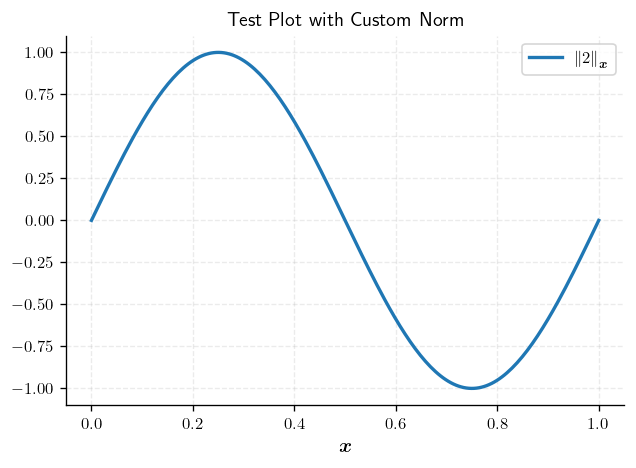

In [3]:
# ---- Sanity check: matplotlib preferences ----

x = np.linspace(0, 1, 200)
y = np.sin(2*np.pi*x)
plt.plot(x, y, label=r"$\norm{2}{\vx}$")
plt.title("Test Plot with Custom Norm")
plt.xlabel(r"$\vx$")
plt.legend(); plt.show()